In [2]:
pip install autoreject

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.4 MB/s eta 0:00:005.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mne
from autoreject import AutoReject
import numpy as np 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
from pycrostates.preprocessing import extract_gfp_peaks
from pycrostates.cluster import ModKMeans
%matplotlib qt 



In [ ]:
def prepare_for_autoreject(d_path,ch_eog,ch_exclude=None,inspect=False,
                           raw=mne.io.read_raw_bdf(
                               fname,
                               eog=ch_eog,
                               misc=ch_ecg,
                               exclude=ch_exclude,
                               stim_channel="Status",
                               preload=True)):
    raw.set_montage("biosemi64")
    raw.notch_filter(notch)
    raw.filter(bandpass_low, bandpass_high)
    if inspect:
        raw.plot()
    events_raw = mne.find_events(raw,stim_channel="status


In [4]:
d_path = "eeg_files/20241017_kp.bdf" #ścieżka do pliku
ch_eog = ["EXG1","EXG2"] #zdefiniowanie dedykowanych kanałów EOG
ch_ecg = ["EXG3","EXG4"] #zdefiniowanie dedykowanych kanałów ECG
ch_exclude = [f"EXG{i}" for i in range(5,9)] #wykluczenie kanałów niewykorzystanych w badaniu

"""ZAŁADOWANIE SYGNAŁU I USTAWIENIE UKŁADU ELEKTROD"""
raw = mne.io.read_raw_bdf(
    d_path, preload = True, eog = ch_eog, misc = ch_ecg, exclude = ch_exclude 
)
raw.set_montage("biosemi64")
raw.set_eeg_reference(projection=True)
raw.filter(0.1, 45)
raw.notch_filter(50)

Extracting EDF parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/eeg_files/20241017_kp.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [11]:
epochs = mne.make_fixed_length_epochs(raw, duration=4, preload=True)


Not setting metadata
357 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 357 events and 8192 original time points ...
0 bad epochs dropped


In [12]:
epochs.load_data()

<Epochs | 357 events (all good), 0 – 4 s (baseline off), ~1.50 GiB, data loaded,
 '1': 357>

In [13]:
ar = AutoReject(n_interpolate=[1,4,8,16])
ar.fit(epochs)

Running autoreject on ch_type=eeg


/opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Creating augmented epochs : 64/64 [00:12<00:00,    5.21it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Computing thresholds ... : 64/64 [10:26<00:00,    9.78s/it]


  0%|                                                                                                                                | Repairing epochs : 0/357 [00:00<?,       ?it/s]

  0%|▎                                                                                                                           | Repairing epochs : 1/357 [00:00<01:





Estimated consensus=0.60 and n_interpolate=16


AutoReject(consensus=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
      cv=10, n_interpolate=[1, 4, 8, 16], n_jobs=1, picks=None,
      random_state=None, thresh_method='bayesian_optimization',
      verbose=True)

In [14]:
epochs_ar, reject_log = ar.transform(epochs, return_log=True)



  0%|                                                                                                                                | Repairing epochs : 0/357 [00:00<?,       ?it/s]

  0%|▎                                                                                                                           | Repairing epochs : 1/357 [00:01<06:27,    1.09s/it]

  1%|▋                                                                                                                           | Repairing epochs : 2/357 [00:01<03:37,    1.63it/s]

  1%|█                                                                                                                           | Repairing epochs : 3/357 [00:01<02:40,    2.20it/s]

  1%|█▍                                                                                                                          | Repairing epochs : 4/357 [00:01<02:13,    2.64it/s]

  1%|█▋                                                                       

Dropped 65 epochs: 25, 26, 33, 34, 35, 39, 48, 59, 61, 62, 63, 79, 84, 90, 93, 95, 99, 101, 102, 115, 116, 119, 125, 126, 131, 132, 133, 134, 139, 153, 157, 162, 163, 167, 168, 173, 174, 179, 181, 183, 184, 191, 193, 196, 197, 199, 200, 206, 207, 208, 209, 214, 219, 220, 227, 228, 229, 231, 237, 241, 242, 243, 244, 245, 338


Using matplotlib as 2D backend.


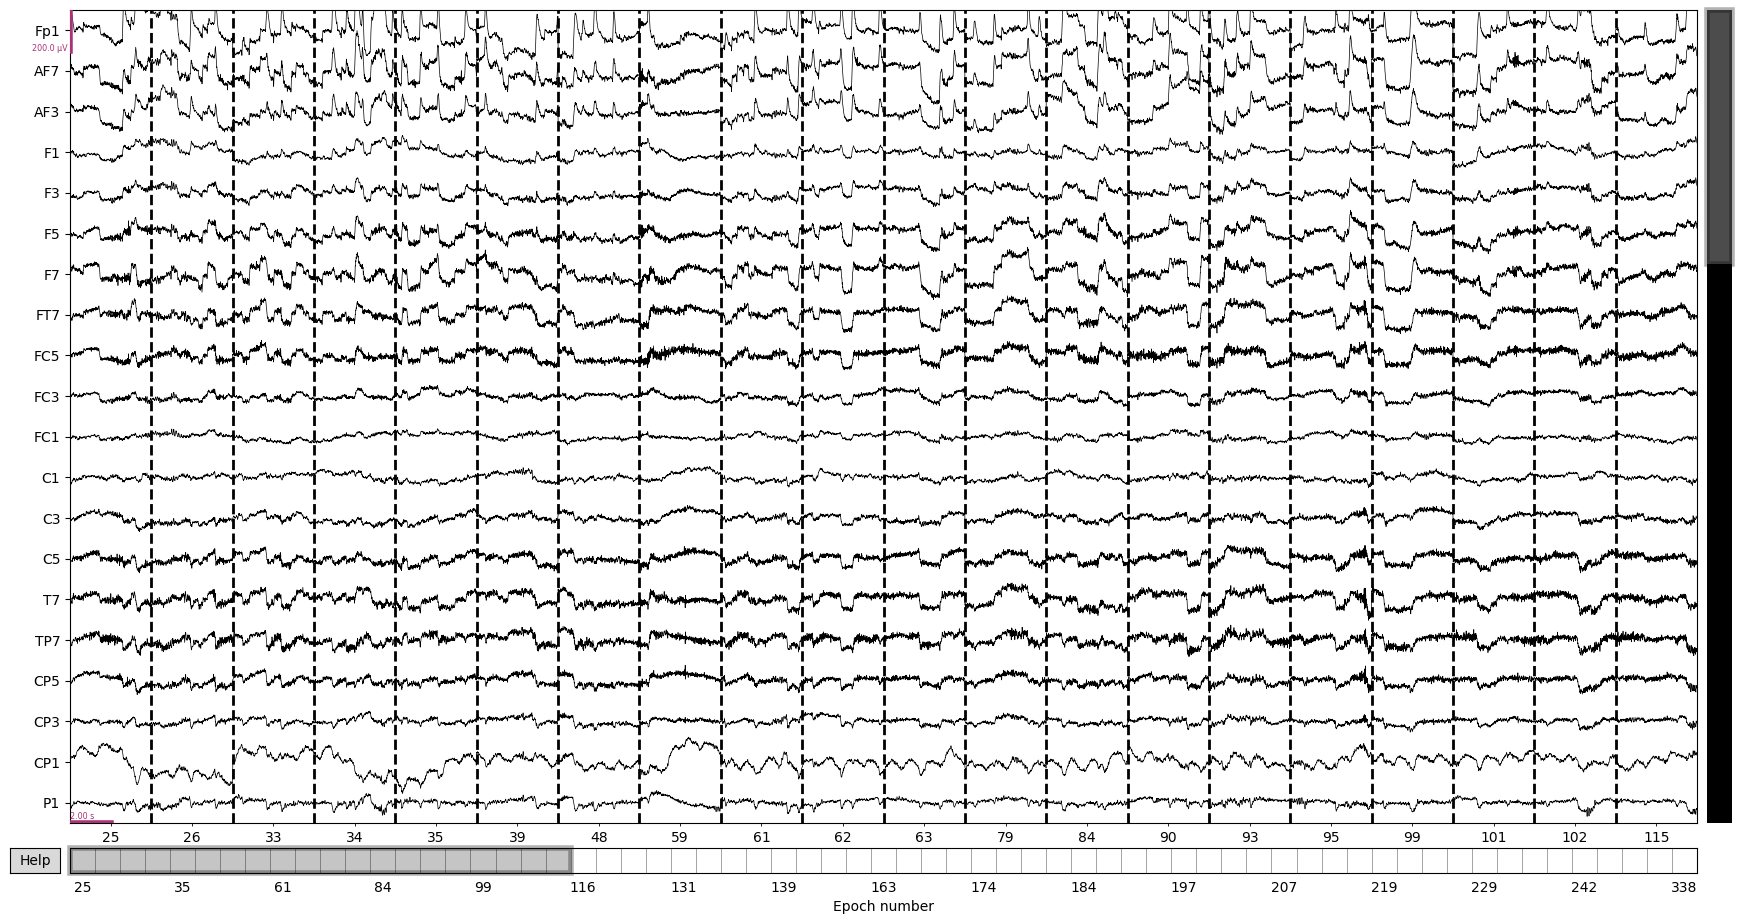

2025-05-19 13:00:47.253 Python[66883:16082475] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-19 13:00:47.253 Python[66883:16082475] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [15]:
epochs[reject_log.bad_epochs].plot(scalings=dict(eeg=100e-6))

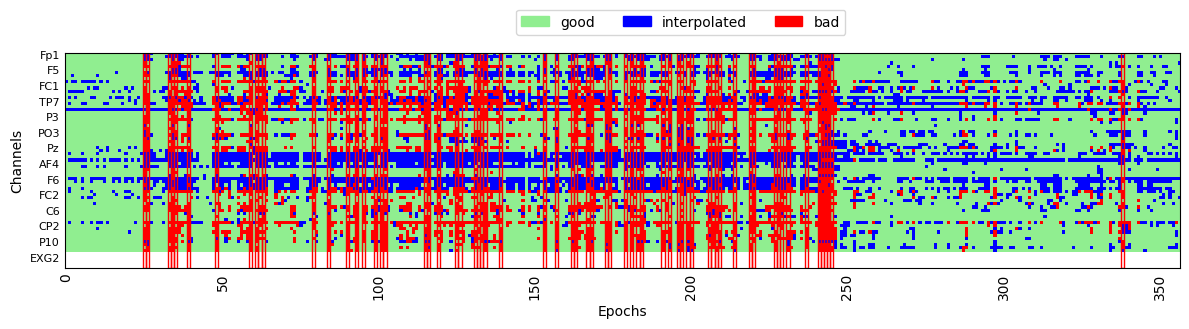

In [16]:
reject_log.plot('horizontal')

In [17]:
reject_log.save("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg", overwrite=True)

In [19]:
ica = mne.preprocessing.ICA(
    n_components=None, 
    max_iter='auto', 
    random_state=97
    )
ica.fit(epochs[~reject_log.bad_epochs])

Fitting ICA to data using 64 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by non-zero PCA components: 63 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 111.4s.


<ICA | epochs decomposition, method: fastica (fit in 104 iterations on 2392064 samples), 63 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

In [20]:
ica.plot_components()

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260 with 3 Axes>]

2025-05-19 13:07:34.402 Python[66883:16082475] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-19 13:07:34.402 Python[66883:16082475] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-19 13:07:34.402 Python[66883:16082475] Text input context does not respond to _valueForTIProperty:


In [21]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw)
eog_evoked = eog_epochs.average()
eog_indices, eog_scores = ica.find_bads_eog(epochs)

Using EOG channels: EXG1, EXG2
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EXG2 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 421 significant peaks
Number of EOG events detected: 421
Not setting metadata
421 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
Using data from preloaded Raw for 421 events and 2049 original tim

In [22]:
ica.plot_components(inst=epochs)

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260 with 3 Axes>]

2025-05-19 13:09:41.228 Python[66883:16082475] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-19 13:09:41.228 Python[66883:16082475] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-19 13:09:41.228 Python[66883:16082475] Text input context does not respond to _valueForTIProperty:


    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated
    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated
    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated


In [23]:
print(eog_indices)

[np.int64(0)]


Applying ICA to Evoked instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (63 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


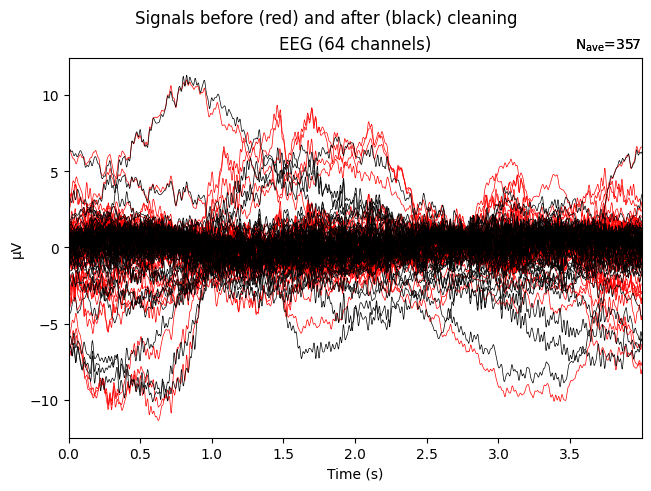

In [25]:
ica.plot_overlay(epochs.average(), exclude=[0,1])

    Applying projection operator with 1 vector (pre-whitener application)


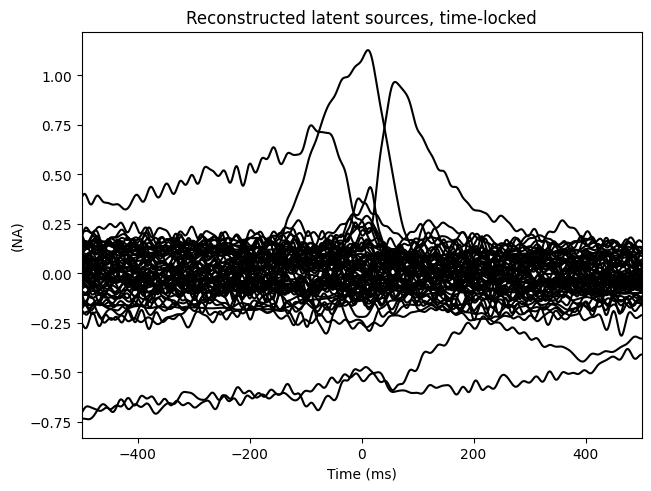

In [27]:
ica.plot_sources(eog_evoked)

In [1]:
ica.plot_sources(epochs[~reject_log.bad_epochs])

NameError: name 'ica' is not defined

In [31]:
eog_indices, eog_scores = ica.find_bads_eog(raw)

Using EOG channels: EXG1, EXG2
    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)



In [32]:
print(eog_indices)

[np.int64(0), np.int64(1)]


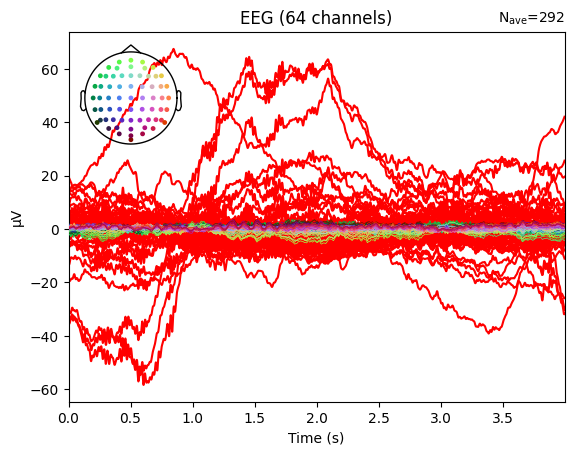

In [35]:
import matplotlib.pyplot as plt
evoked_bad = epochs[reject_log.bad_epochs].average()
plt.figure()
plt.plot(evoked_bad.times, evoked_bad.data.T * 1e6, 'r', zorder=-1)
epochs_ar.average().plot(axes=plt.gca())

    Applying projection operator with 1 vector (pre-whitener application)


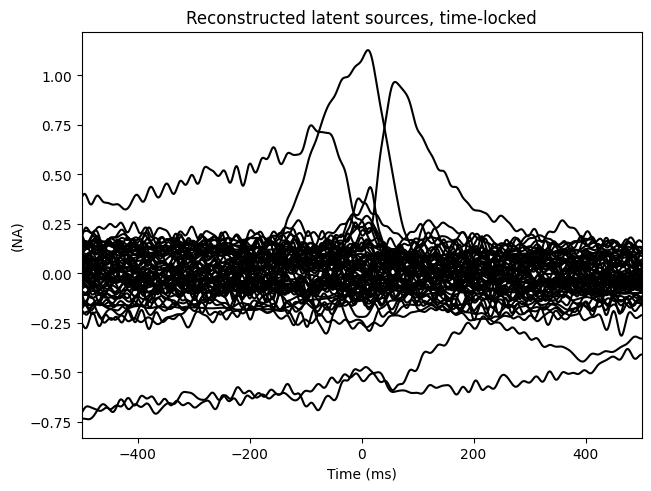

In [36]:
ica.plot_sources(eog_evoked)

In [51]:

eog_indices, eog_scores = ica.find_bads_eog(epochs_ar)
print(eog_indices)

Using EOG channels: EXG1, EXG2
    Applying projection operator with 1 vector (pre-whitener application)
    Applying projection operator with 1 vector (pre-whitener application)
[np.int64(54)]


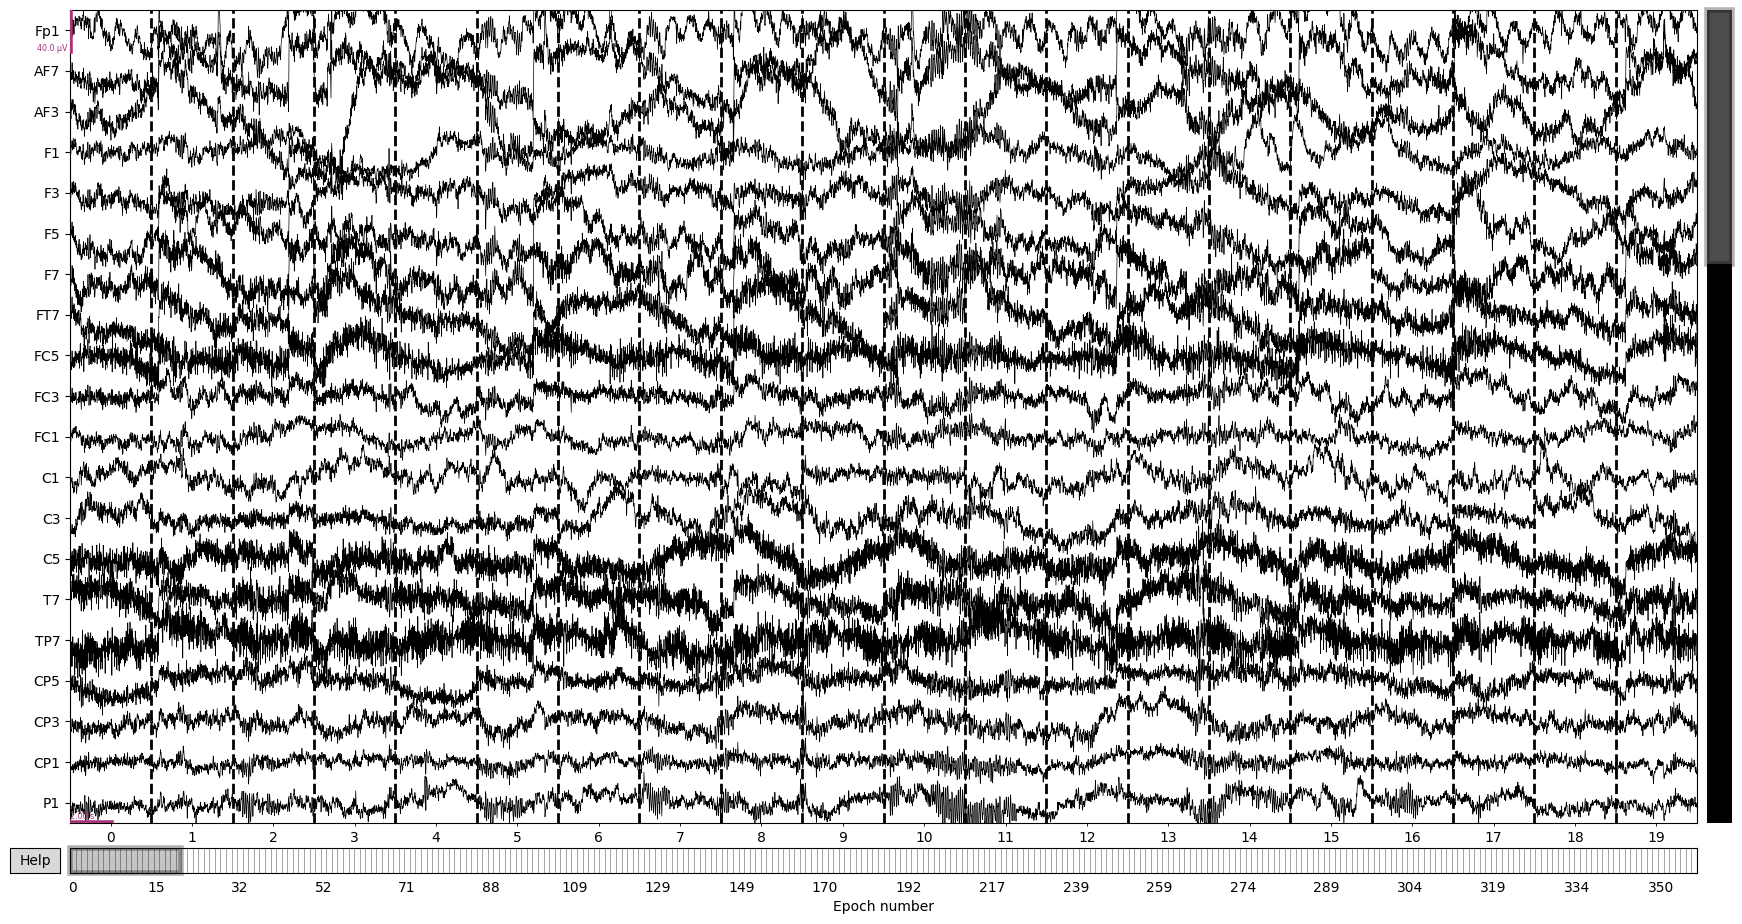

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [43]:
epochs_ar.plot()

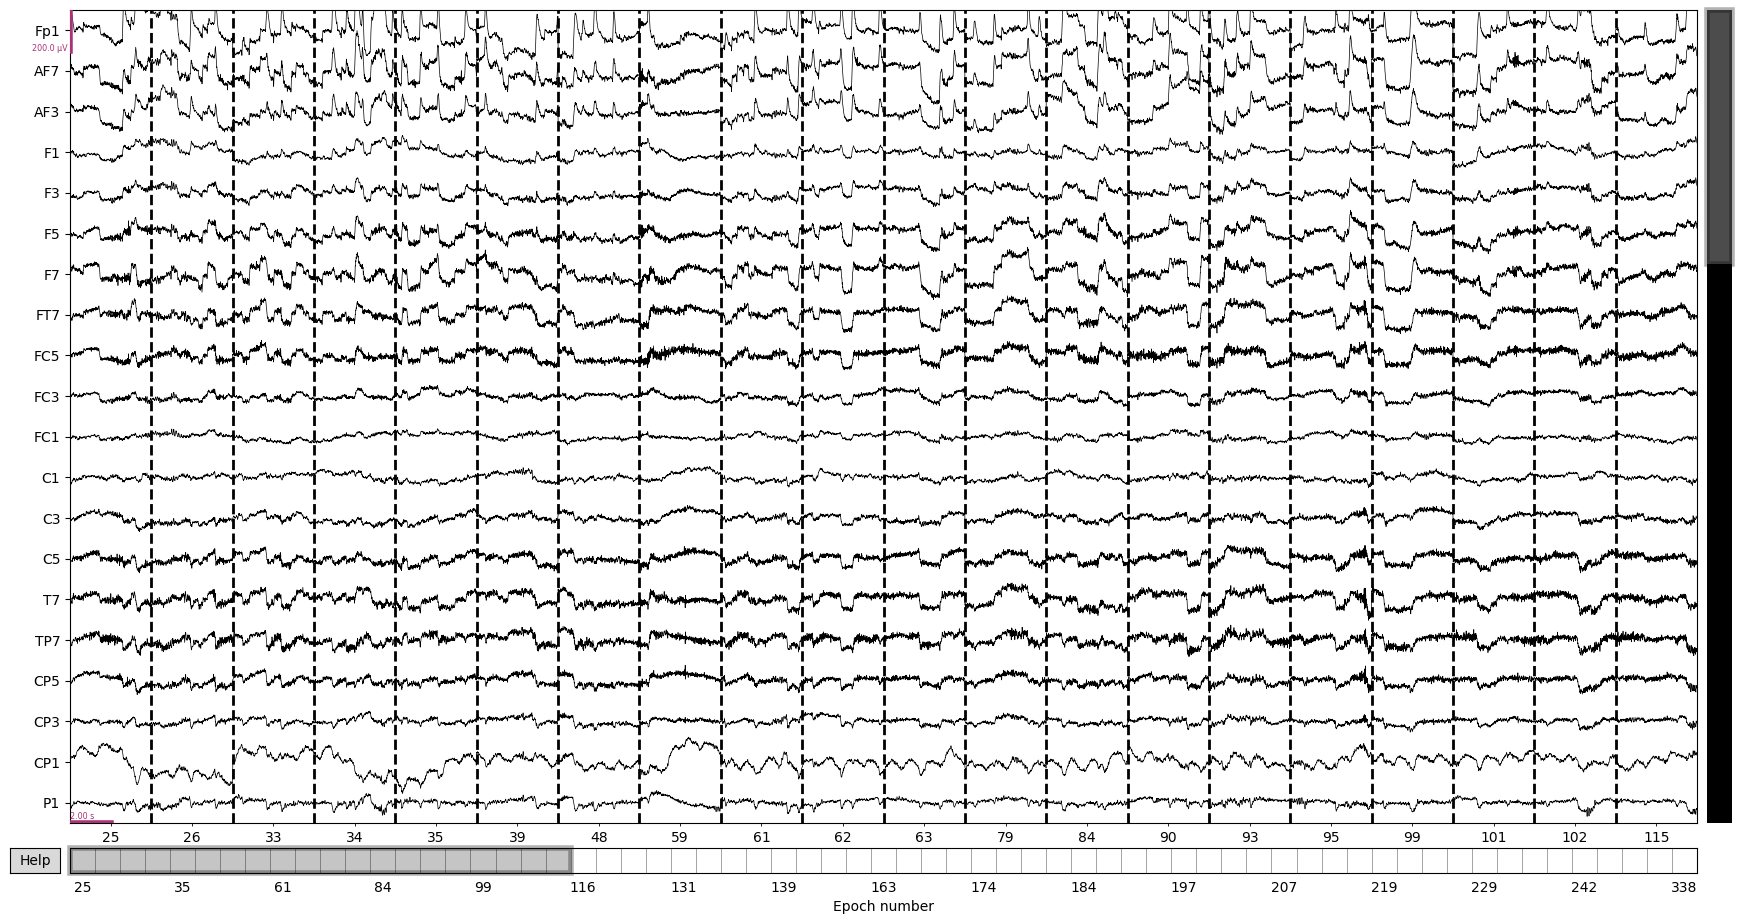

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [44]:
epochs[reject_log.bad_epochs].plot(scalings=dict(eeg=100e-6))

In [49]:

ica.plot_components(inst=epochs)

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260 with 3 Axes>]

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated
    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated


Applying ICA to Evoked instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (63 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


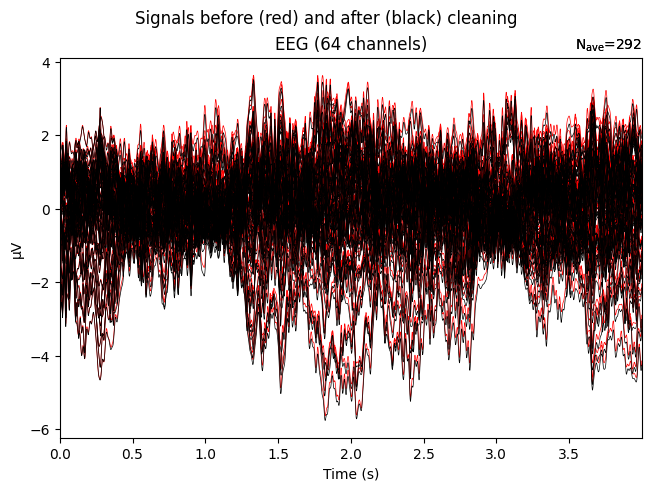

In [50]:
ica.plot_overlay(epochs_ar.average())

In [52]:

ecg_indices, ecg_scores = ica.find_bads_ecg(epochs_ar,ch_name="EXG3")
print(ecg_indices)

Using threshold: 0.12 for CTPS ECG detection
    Applying projection operator with 1 vector (pre-whitener application)
[]


In [54]:
emg_indices,emg_scores = ica.find_bads_muscle(epochs_ar)
print(emg_indices)

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
[0, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 40, 42, 45, 46, 47, 49, 51, 52, 55, 56, 57, 58, 59, 62]


Applying ICA to Evoked instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (63 components)
    Zeroing out 41 ICA components
    Projecting back using 64 PCA components


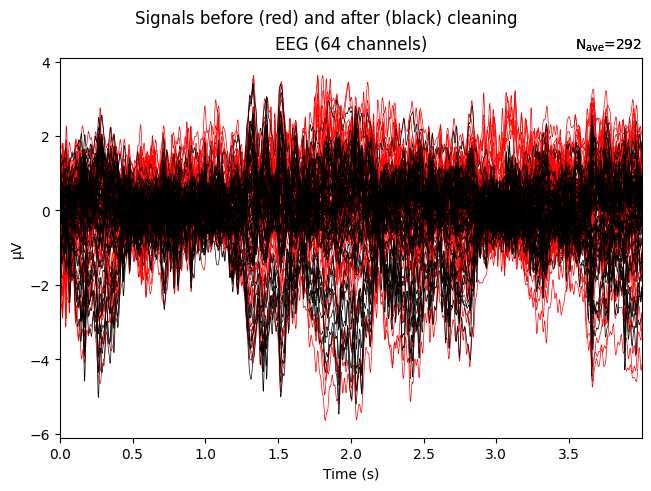

In [56]:
ica.plot_overlay(epochs_ar.average(), exclude=[54,0, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 40, 42, 45, 46, 47, 49, 51, 52, 55, 56, 57, 58, 59, 62])


In [57]:
if eog_indices:
    ica.plot_properties(epochs_ar, picks=eog_indices, psd_args={'fmax': 45.0})
    print(f"Sprawdź właściwości komponentów EOG: {eog_indices}")

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated
Sprawdź właściwości komponentów EOG: [np.int64(54)]


    Applying projection operator with 1 vector (pre-whitener application)
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated


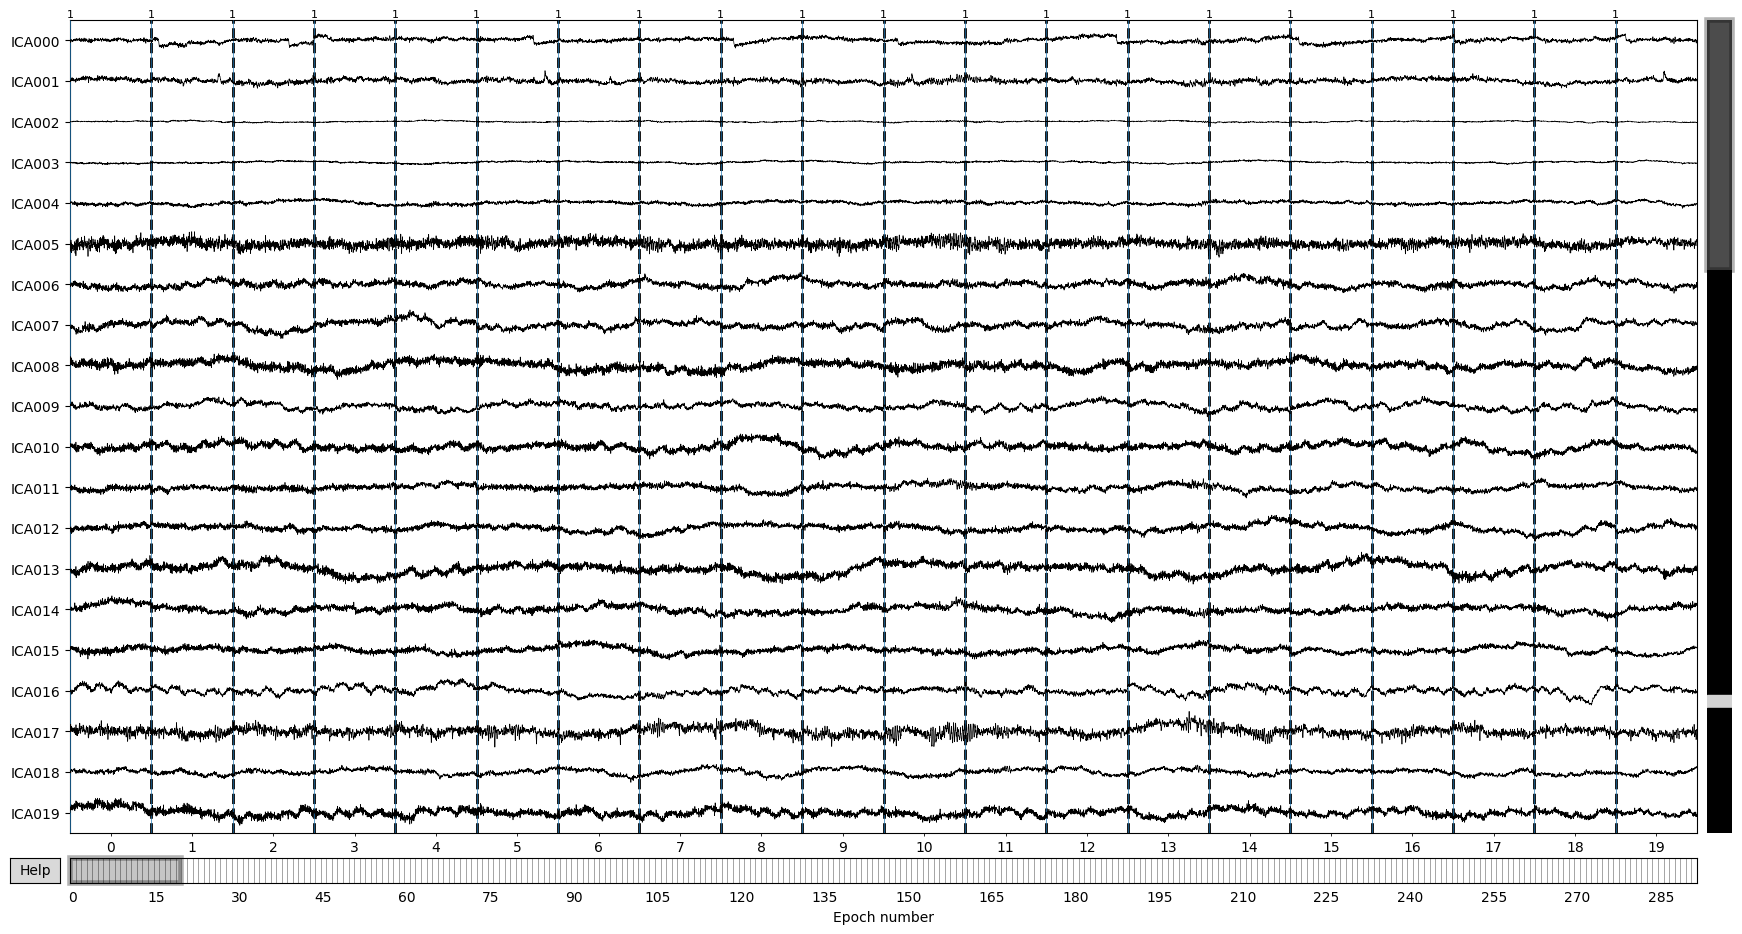

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated


In [63]:
ica.plot_sources(epochs_ar, show_scrollbars=True)

In [83]:
ica.exclude=[0,1,54] 
epochs_ica_cleaned_1 = epochs_ar.copy()
picks_eeg = mne.pick_types(epochs_ar.info, eeg=True, meg=False, eog=False, ecg=False, exclude='bads')


In [84]:
ica.apply(epochs_ica_cleaned_1, exclude=ica.exclude)

Exception ignored in: <function ResourceTracker.__del__ at 0x1030cf4c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10513b4c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

<Epochs | 292 events (all good), 0 – 4 s (baseline off), ~1.23 GiB, data loaded,
 '1': 292>

Exception ignored in: <function ResourceTracker.__del__ at 0x106bb74c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106b5f4c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [87]:
epochs_eeg_final_1 = epochs_ica_cleaned_1.copy().pick_types(eeg=True, exclude='bads')
epochs_eeg_final_1.set_eeg_reference("average")

<Epochs | 292 events (all good), 0 – 4 s (baseline off), ~1.14 GiB, data loaded,
 '1': 292>

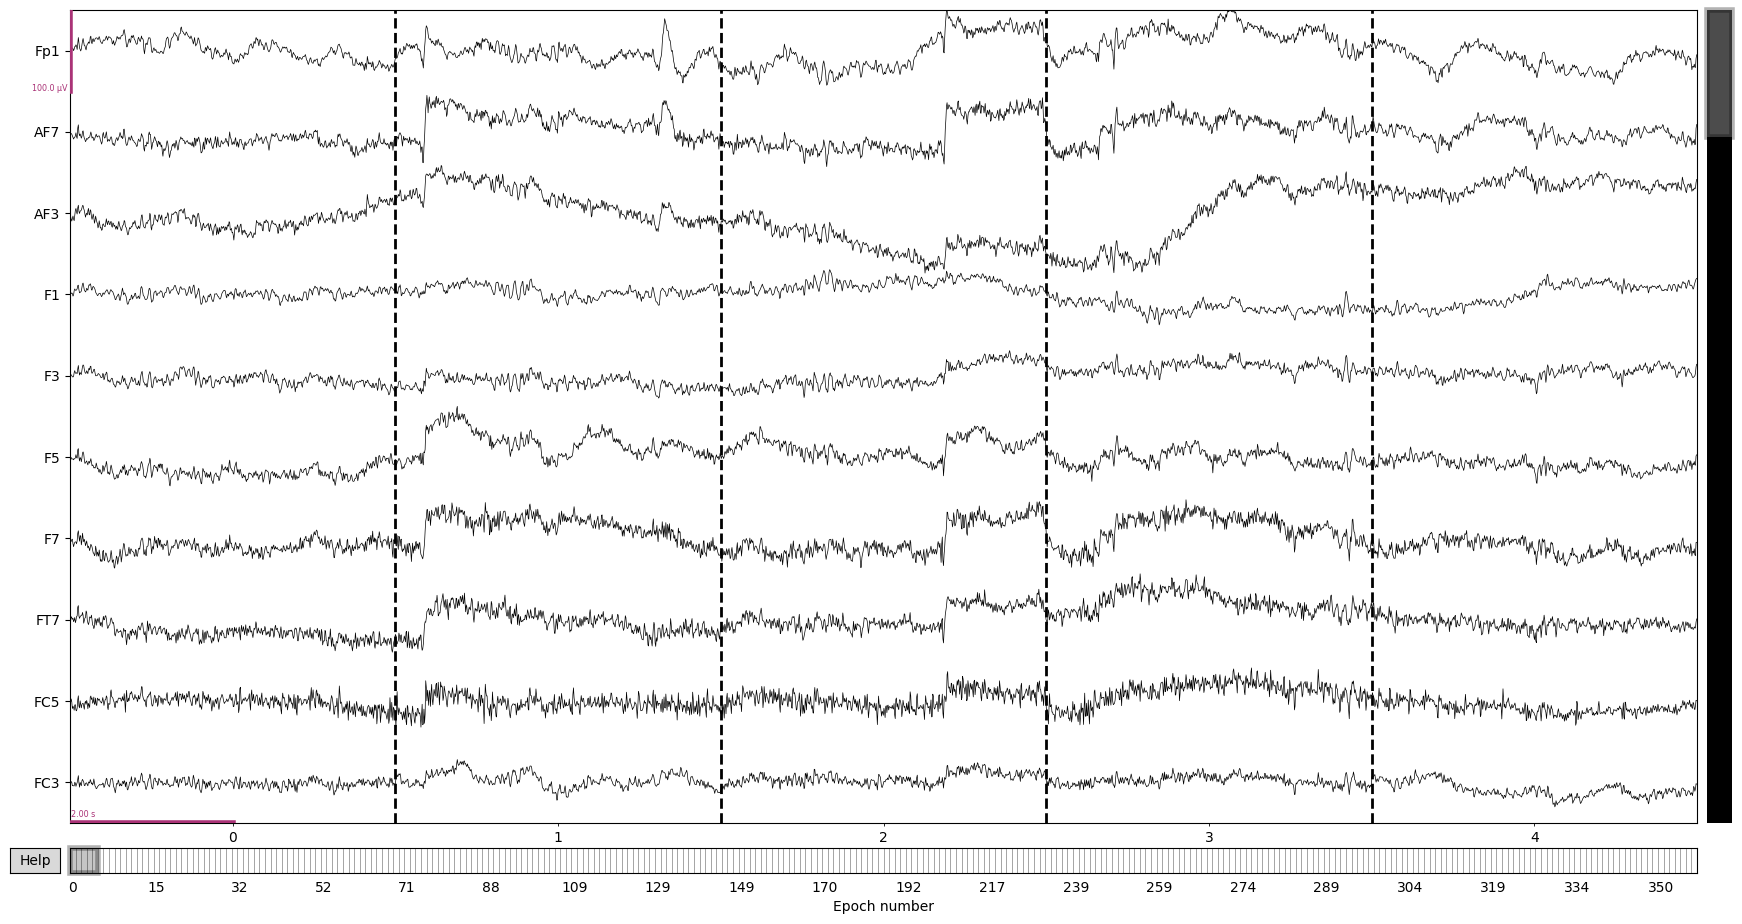

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [75]:
epochs_ar.plot(title="Przed ICA", n_epochs=5, n_channels=10, scalings=dict(eeg=50e-6))
epochs_eeg_final_1.plot(title="Po ICA (tylko EEG)", n_epochs=5, n_channels=10, scalings=dict(eeg=50e-6))

Exception ignored in: <function ResourceTracker.__del__ at 0x102e674c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


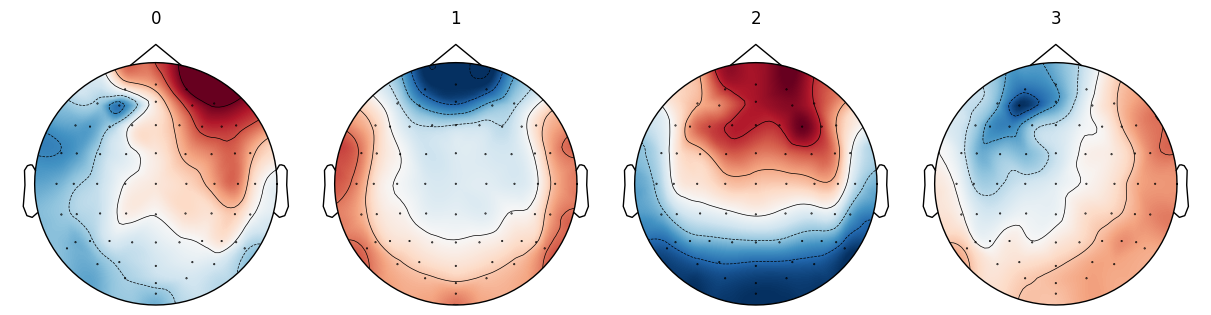

Exception ignored in: <function ResourceTracker.__del__ at 0x108edf4c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104b434c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [89]:
gfp_data = extract_gfp_peaks(epochs_eeg_final_1, min_peak_distance=3)
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(gfp_data, n_jobs=100, verbose="WARNING")
ModK.plot()

In [81]:
from mne_icalabel import label_components
ic_labels_1 = label_components(epochs_ar, ica, method='iclabel')
labels_1 = ic_labels_1["labels"]

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/3962568230.py:2: RuntimeWarning: The provided Epochs instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels_1 = label_components(epochs_ar, ica, method='iclabel')
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/3962568230.py:2: RuntimeWarning: The provided Epochs instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_1 = label_components(epochs_ar, ica, method='iclabel')
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/3962568230.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was d

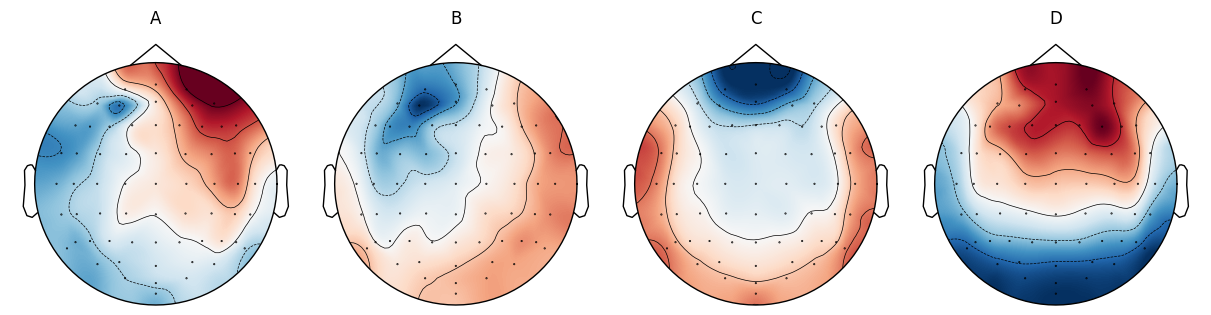

In [90]:
ModK.reorder_clusters(order=[0, 3, 1,2])
ModK.rename_clusters(new_names=['A', 'B', 'C', 'D'])
ModK.plot()

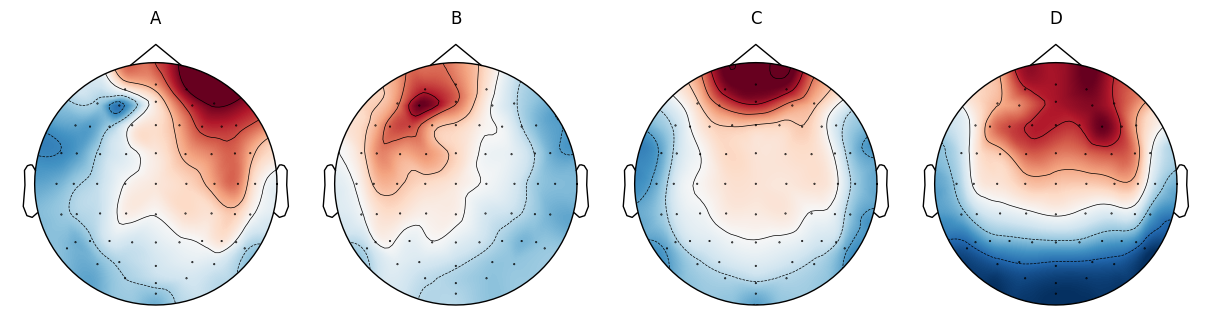

In [91]:
ModK.invert_polarity([False, True, True,False])
ModK.plot()

In [93]:
ica.save("best_ica_19.05-ica.fif",overwrite=True,verbose=None)

<ICA | epochs decomposition, method: fastica (fit in 104 iterations on 2392064 samples), 63 ICA components (64 PCA components available), channel types: eeg, 3 sources marked for exclusion>

In [102]:
pip install eeglabio



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
mne.export.export_epochs(fname="epochs_ar_1.set",epochs=epochs_ar,fmt="auto",overwrite=True)

/opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/lib/python3.13/site-packages/eeglabio/epochs.py:109 EEGLABIO: WARNING: Invalid event latencies, ignored for export.


In [106]:
epochs_ar.save("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs.edf", overwrite=True)

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/2343747185.py:1: RuntimeWarning: This filename (/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs.edf) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_ar.save("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs.edf", overwrite=True)


[PosixPath('/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs.edf')]

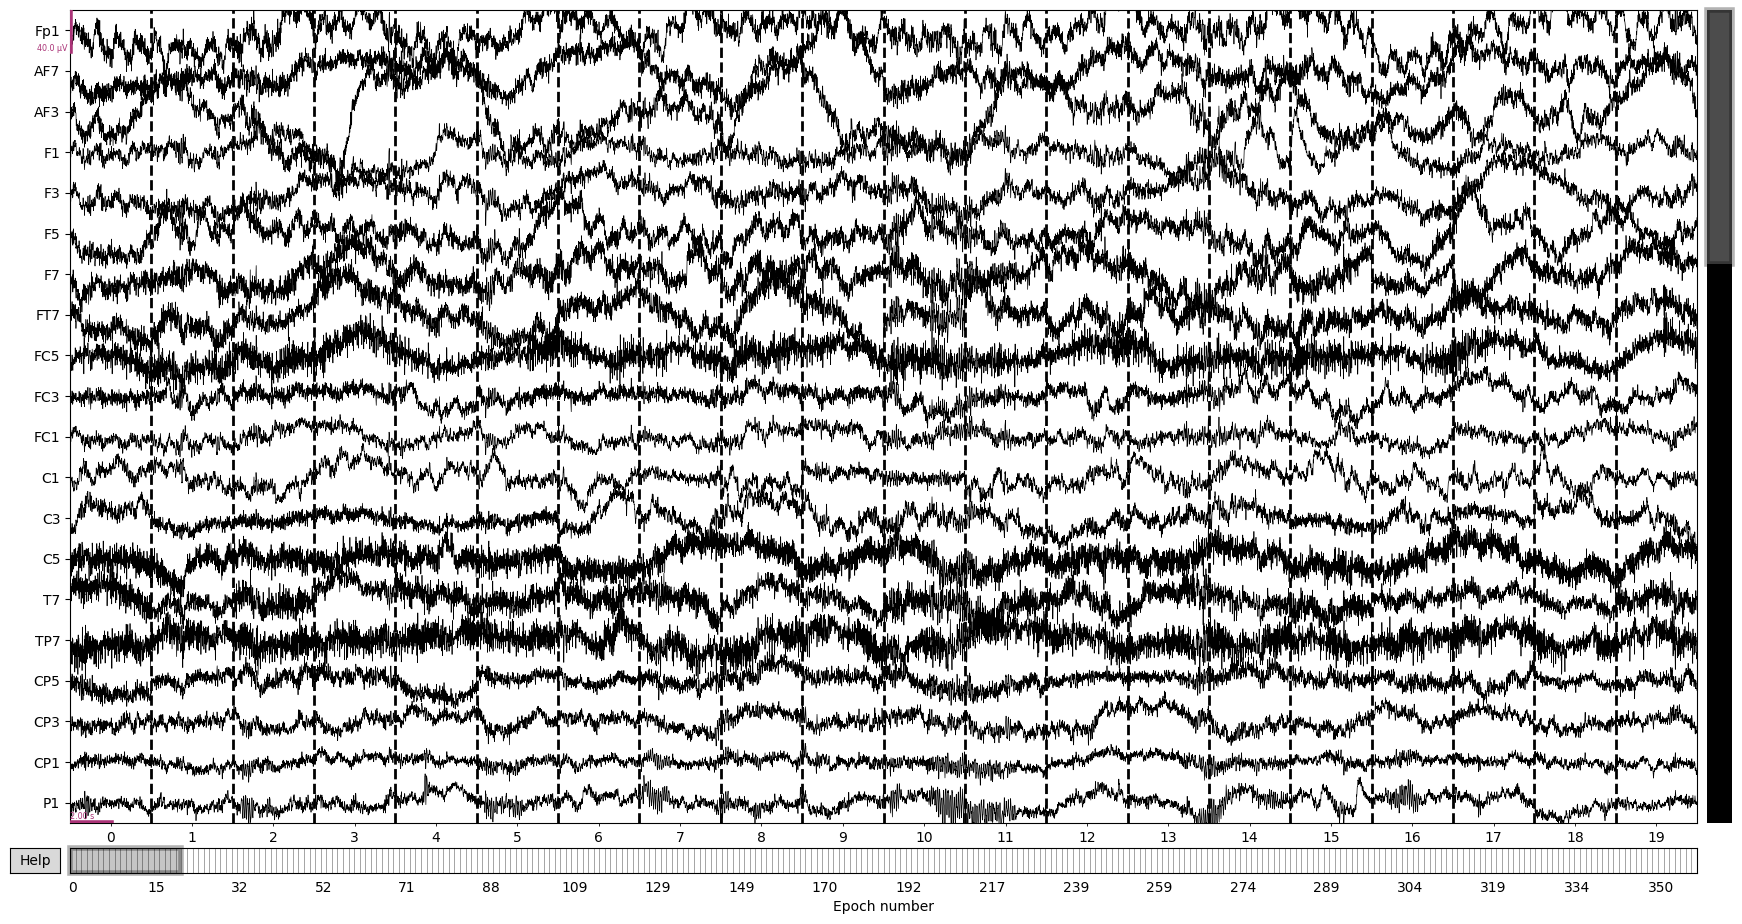

2025-05-19 14:42:36.567 Python[66883:16082475] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-19 14:42:36.567 Python[66883:16082475] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-19 14:42:36.568 Python[66883:16082475] Text input context does not respond to _valueForTIProperty:
2025-05-19 14:42:45.064 Python[66883:16082475] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-19 14:42:45.064 Python[66883:16082475] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-19 14:42:45.064 Python[66883:16082475] Text input context does not respond to _valueForTIProperty:


In [107]:
epochs_eeg_final_1.plot()

In [109]:
epochs_eeg_final_1_cropped = epochs_eeg_final_1.copy()

In [123]:
epochs_eeg_final_1_cropped.crop(0,300)

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/2592016019.py:1: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.Epochs'>.tmax (3.99951 s)
  epochs_eeg_final_1_cropped.crop(0,300)


<Epochs | 292 events (all good), 0 – 4 s (baseline off), ~1.14 GiB, data loaded,
 '1': 292>

In [121]:
loaded_epochs_after_ica = mne.read_epochs_eeglab("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs_ar_1.set")

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_66883/2458650463.py:1: RuntimeWarning: Estimated head radius (11.4 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  loaded_epochs_after_ica = mne.read_epochs_eeglab("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/epochs_ar_1.set")


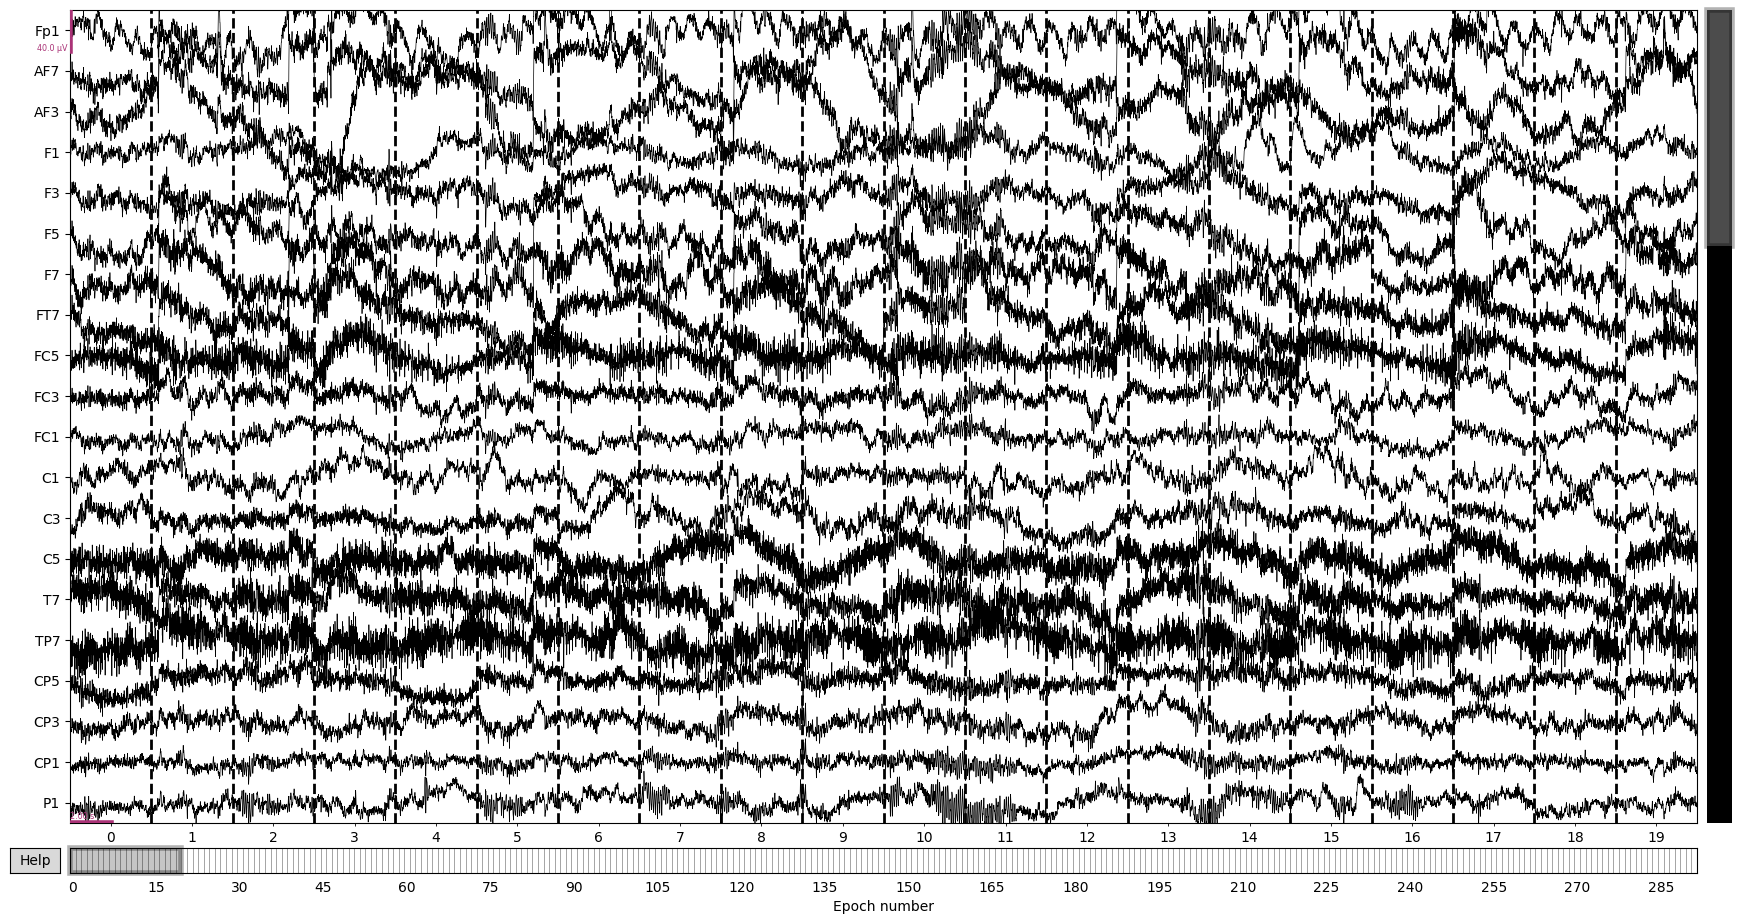

In [122]:
loaded_epochs_after_ica.plot()

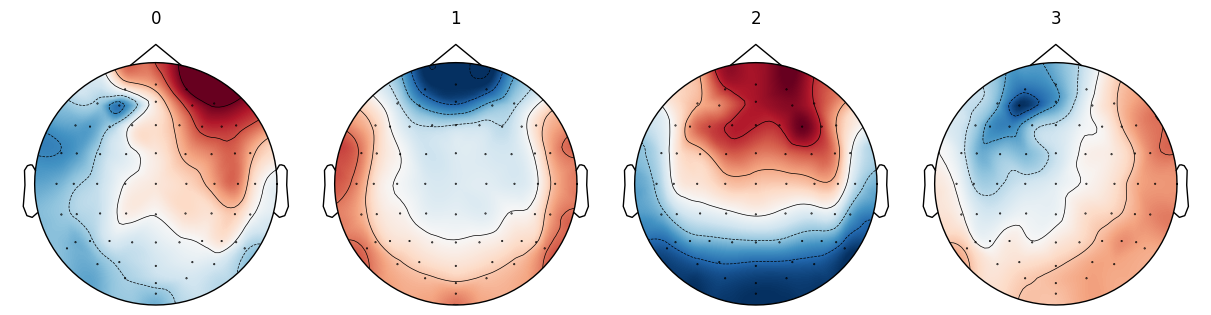

Exception ignored in: <function ResourceTracker.__del__ at 0x1066a34c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1052db4c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [124]:
gfp_data_2 = extract_gfp_peaks(epochs_eeg_final_1_cropped, min_peak_distance=3)
ModK_2 = ModKMeans(n_clusters=4, random_state=42)
ModK_2.fit(gfp_data, n_jobs=100, verbose="WARNING")
ModK_2.plot()